# Lab#1: Convert model.pb into model.tflite (Student)


---



Mount your Google Drive

/ is the root folder of colab and drive is the virtual folder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!unzip /content/drive/MyDrive/ML2022/MediaTek_IEE5725_Machine_Learning_Lab1.zip -d /content/drive/MyDrive/ML2022/lab1/
!unzip /content/drive/MyDrive/ML2022/ICME2022_Training_Dataset_student.zip -d /content/drive/MyDrive/ML2022/

In [ ]:
!unzip /content/drive/MyDrive/ML2022/MediaTek_IEE5725_Machine_Learning_Lab2.zip -d /content/drive/MyDrive/ML2022/lab2/
!unzip /content/drive/MyDrive/ML2022/MediaTek_IEE5725_Machine_Learning_Lab3.zip -d /content/drive/MyDrive/ML2022/lab3/

In [ ]:
!unzip /content/drive/MyDrive/ML2022/ICME2022_Training_Dataset_update.zip -d /content/drive/MyDrive/ML2022/

Archive:  /content/drive/MyDrive/ML2022/ICME2022_Training_Dataset_update.zip
   creating: /content/drive/MyDrive/ML2022/ICME2022_Training_Dataset/images_real_world/
  inflating: /content/drive/MyDrive/ML2022/ICME2022_Training_Dataset/images_real_world/0501.jpg  
  inflating: /content/drive/MyDrive/ML2022/ICME2022_Training_Dataset/images_real_world/0502.jpg  
  inflating: /content/drive/MyDrive/ML2022/ICME2022_Training_Dataset/images_real_world/0503.jpg  
  inflating: /content/drive/MyDrive/ML2022/ICME2022_Training_Dataset/images_real_world/0504.jpg  
  inflating: /content/drive/MyDrive/ML2022/ICME2022_Training_Dataset/images_real_world/0505.jpg  
  inflating: /content/drive/MyDrive/ML2022/ICME2022_Training_Dataset/images_real_world/0506.jpg  
  inflating: /content/drive/MyDrive/ML2022/ICME2022_Training_Dataset/images_real_world/0507.jpg  
  inflating: /content/drive/MyDrive/ML2022/ICME2022_Training_Dataset/images_real_world/0508.jpg  
  inflating: /content/drive/MyDrive/ML2022/ICME2022

In [ ]:
!pip install tensorflow-gpu==1.15

     |████████████████████████████████| 411.5 MB 8.0 kB/s 
     |████████████████████████████████| 50 kB 7.9 MB/s 
     |████████████████████████████████| 3.8 MB 55.6 MB/s 
     |████████████████████████████████| 503 kB 67.5 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=4f33c467e38bc0a6deb92a3c3df5994444d104f56be5f3d39a26793274b4862c
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Succe

In [ ]:
import cv2
import matplotlib.pyplot as plt
import random
import os
import numpy as np
import tensorflow as tf

from pathlib import Path

# Confirm your TF version

In [ ]:
print("Tensorflow Version is %s" % tf.__version__)

Tensorflow Version is 1.15.0


# **FIXME#1**

1.   Read your model.pb and set your input and output node name.
2.   use converter to conver your model.pb into model.tflite



In [ ]:
converter = tf.lite.TFLiteConverter.from_frozen_graph(
    graph_def_file = '/content/drive/MyDrive/ML2022/lab1/MediaTek_IEE5725_Machine_Learning_Lab1/lab1_model.pb',
    input_arrays = ['Placeholder'],
    input_shapes = {'Placeholder':[1, 1080, 1920, 3]},
    output_arrays = ['ArgMax'],
)
tflite_model = converter.convert()
open('/content/drive/MyDrive/ML2022/lab1/MediaTek_IEE5725_Machine_Learning_Lab1/lab1_model.tflite', 'wb').write(tflite_model)

16622248

# Prepare your inference image.

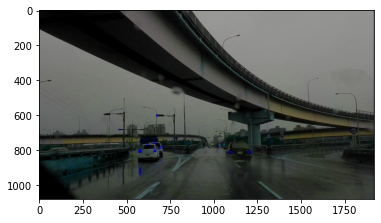

In [ ]:
img = cv2.imread('/content/drive/MyDrive/ML2022/lab3/MediaTek_IEE5725_Machine_Learning_Lab3/Testing_Data_for_Qualification/0002.jpg')
plt.imshow(img)

# Set data type according to your model input type.

In [ ]:
img = np.expand_dims(img,0)
img = img.astype(np.float32)

# **FIXME#2**
Import your tflie model and set input and output

In [ ]:
interpreter = tf.lite.Interpreter('/content/drive/MyDrive/ML2022/lab1/MediaTek_IEE5725_Machine_Learning_Lab1/lab1_model.tflite')
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

Inference your prepared image and get output.

In [ ]:
interpreter.set_tensor(input_details[0]['index'], img)
interpreter.invoke()
output = interpreter.get_tensor(output_details[0]['index'])

# Show your inference result.

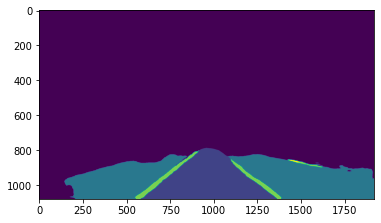

In [ ]:
plt.imshow(output[0])

# Run your model on real device.

## Lab#2

# **FIXME#1**
Preparing your calibration data

In [ ]:
def representative_dataset():
  for data in Path('/content/drive/MyDrive/ML2022/lab3/MediaTek_IEE5725_Machine_Learning_Lab3/Testing_Data_for_Qualification/').glob('*.jpg'):
    img = cv2.imread(str(data))
    img = np.expand_dims(img,0)
    img = img.astype(np.float32)
    yield [img]


# **FIXME#2** 
Preparing your FP32 model (Please refer to Lab#1) and do post training quantization by NN API (https://www.tensorflow.org/lite/performance/post_training_quantization)
> the compiling time depends the number of calibration images



In [ ]:
converter = tf.lite.TFLiteConverter.from_frozen_graph(
    graph_def_file = '/content/drive/MyDrive/ML2022/lab2/MediaTek_IEE5725_Machine_Learning_Lab2/lab2_model.pb',
    input_arrays = ['Placeholder'],
    input_shapes = {'Placeholder':[1, 1080, 1920, 3]},
    output_arrays = ['ArgMax'],
)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
tflite_model = converter.convert()
open('/content/drive/MyDrive/ML2022/lab2/MediaTek_IEE5725_Machine_Learning_Lab2/lab2_quantized_model.tflite', 'wb').write(tflite_model)

4222856

## Lab#3

In [ ]:
import cv2
import matplotlib.pyplot as plt
import random
import torch
import torch.utils.data as data
import torchvision.transforms as transforms
import glob
import torch.nn as nn
import torch.nn.functional as F
import os
import numpy as np
import tensorflow as tf

from pathlib import Path
from tensorflow.python.framework.graph_util import convert_variables_to_constants

# Data Process

In [ ]:
class DataLoaderSegmentation(data.Dataset):
    def __init__(self, input_path,label_path,label_name='',transform=None):
        super(DataLoaderSegmentation, self).__init__()
        self.img_files = glob.glob(os.path.join(input_path,'*.jpg'))
        self.mask_files = []
        self.transforms = transform
        for img_path in self.img_files:
             self.mask_files.append(os.path.join(label_path,os.path.basename(img_path).split('.')[0]+label_name+'.png'))

    def __getitem__(self, index):
            img_path = self.img_files[index]
            mask_path = self.mask_files[index]
            data = cv2.imread(img_path)
            label = cv2.imread(mask_path,cv2.IMREAD_GRAYSCALE)
            label = F.one_hot(torch.from_numpy(label).to(torch.int64),6)
            datalabel = np.concatenate((data,label),axis=2)
            datalabel = np.transpose(datalabel,[2,0,1])
            if self.transforms!=None:
              datalabel = self.transforms(torch.from_numpy(datalabel).float())
            datalabel = np.transpose(datalabel,[1,2,0])
            data = datalabel[:,:,0:3]
            label = datalabel[:,:,3:9]
            return data,label

    def __len__(self):
        return len(self.img_files)

# Prepare Training dataset

In [ ]:
input_path='/content/drive/MyDrive/ML2022/ICME2022_Training_Dataset/images'#720/1280
label_path='/content/drive/MyDrive/ML2022/ICME2022_Training_Dataset/labels/class_labels'
dataset = DataLoaderSegmentation(input_path,label_path,'_lane_line_label_id',transforms.Resize(size=(720,1280)))
dataloader = torch.utils.data.DataLoader(dataset, batch_size=25, shuffle=True)

In [ ]:
input_path='/content/drive/MyDrive/ML2022/ICME2022_Training_Dataset/images_real_world'#1080/1920
label_path='/content/drive/MyDrive/ML2022/ICME2022_Training_Dataset/labels_real_world'
dataset_real = DataLoaderSegmentation(input_path,label_path,'',transforms.Resize(size=(1080,1920)))
dataloader_real = torch.utils.data.DataLoader(dataset_real, batch_size=25, shuffle=True)

# FIXME#1 Design the Network
*   input size = 256*256
*   Channel = 15 and Depth = 5
*   backbone: conv2d+BN+Relu
*   output size = 1080*1920





In [ ]:
inputs = tf.placeholder(tf.float32,shape=(None,None, None, 3))
y_ = tf.placeholder(tf.float32, [None,None, None,6])
x = tf.image.resize_images(inputs, (256, 256))
x = x/255.0
y = tf.image.resize_images(y_, (256, 256))
ch = 15 #channel
depth = 5 #depth
xn = []
b = tf.Variable(0.0)
x = tf.layers.conv2d(x,ch,3,1,'same')
x = tf.layers.batch_normalization(x)
x = tf.nn.relu(x)
for i in range(depth):
  xn.append(x)
  x = tf.layers.conv2d(x,ch*(2**(i+1)),3,1,'same')
  x = tf.layers.batch_normalization(x,center=False,scale=False)+b
  x = tf.nn.relu(x)
  x = tf.layers.conv2d(x,ch*(2**(i+1)),3,1,'same')
  x = tf.layers.batch_normalization(x,center=False,scale=False)+b
  x = tf.nn.relu(x)
  if i <depth-1:
    x = tf.nn.avg_pool(x,[1,2,2,1],[1,2,2,1],'SAME')
for i in range(depth):
  if i>0:
    x = tf.keras.layers.UpSampling2D((2,2))(x)
  x = tf.layers.conv2d(x,ch*(2**(depth-i-1)),3,1,'same')+xn[-i-1]
  x = tf.layers.batch_normalization(x,center=False,scale=False)+b
  x = tf.nn.relu(x)
out = tf.layers.conv2d(x,6,3,1,'same')
outputs = out
outputs = tf.image.resize_images(outputs, (1080, 1920))
outputs = tf.argmax(outputs,-1)

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).


# Set up the Hyper parameters

In [ ]:
loss=tf.nn.softmax_cross_entropy_with_logits_v2(logits=out,labels=y)
loss=tf.reduce_mean(loss)
optimizer = tf.train.AdamOptimizer(learning_rate = 0.00001)
train = optimizer.minimize(loss+0.0005*b)
saver=tf.train.Saver()
init = tf.global_variables_initializer()

# Sesstion run and restore Checkpoint

In [ ]:
sess = tf.Session()
sess.run(init)
saver.restore(sess, '/content/drive/MyDrive/ML2022/lab3/MediaTek_IEE5725_Machine_Learning_Lab3/model/')

INFO:tensorflow:Restoring parameters from /content/drive/MyDrive/ML2022/lab3/MediaTek_IEE5725_Machine_Learning_Lab3/model/


InvalidArgumentError: ignored

# Model Profiling to get Flops and #Parameters

In [ ]:
def stats_graph(graph):
  flops = tf.profiler.profile(graph, options=tf.profiler.ProfileOptionBuilder.float_operation())
  params = tf.profiler.profile(graph, options=tf.profiler.ProfileOptionBuilder.trainable_variables_parameter())
  print('FLOPs: {}; Trainable params:{}'.format(flops.total_float_ops, params.total_parameters))
stats_graph(tf.get_default_graph())

Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`


145 ops no flops stats due to incomplete shapes.


FLOPs: 8300731; Trainable params:4152402


145 ops no flops stats due to incomplete shapes.


# Set training Epochs, Print the training logs and Save your Checkpoint

In [ ]:
num_epochs = 1
for epoch in range(num_epochs):
  for i, data in enumerate(dataloader, 0):
    input = data[0].numpy()
    label = data[1].numpy()
    sess.run(train,feed_dict={inputs: input, y_: label})
    if i % 10 == 0:
      print("[%d/%d][%s/%d] loss: %.4f b: %.4f "\
            %(epoch+1, num_epochs, str(i).zfill(4), len(dataloader), sess.run(loss,feed_dict={inputs: input, y_: label}),sess.run(b)) )
    if i%300==0:
      print('checkpoint saved')
      saver.save(sess, 'drive/MyDrive/MediaTek_IEE5725_Machine_Learning_Lab3/model/')
  saver.save(sess, 'drive/MyDrive/MediaTek_IEE5725_Machine_Learning_Lab3/model/')
  print('checkpoint saved')

[1/3][0000/1420] loss: 0.3704 b: 0.0014 
checkpoint saved
[1/3][0010/1420] loss: 0.3227 b: 0.0014 
[1/3][0020/1420] loss: 0.3158 b: 0.0014 
[1/3][0030/1420] loss: 0.3498 b: 0.0014 
[1/3][0040/1420] loss: 0.3271 b: 0.0014 
[1/3][0050/1420] loss: 0.3374 b: 0.0014 
[1/3][0060/1420] loss: 0.3128 b: 0.0014 
[1/3][0070/1420] loss: 0.3374 b: 0.0014 
[1/3][0080/1420] loss: 0.3302 b: 0.0014 
[1/3][0090/1420] loss: 0.3193 b: 0.0014 
[1/3][0100/1420] loss: 0.3362 b: 0.0014 
[1/3][0110/1420] loss: 0.3435 b: 0.0014 
[1/3][0120/1420] loss: 0.3138 b: 0.0014 
[1/3][0130/1420] loss: 0.3072 b: 0.0014 
[1/3][0140/1420] loss: 0.3086 b: 0.0014 
[1/3][0150/1420] loss: 0.3404 b: 0.0014 
[1/3][0160/1420] loss: 0.3348 b: 0.0014 
[1/3][0170/1420] loss: 0.2952 b: 0.0014 
[1/3][0180/1420] loss: 0.2997 b: 0.0014 
[1/3][0190/1420] loss: 0.3190 b: 0.0014 
[1/3][0200/1420] loss: 0.3198 b: 0.0014 
[1/3][0210/1420] loss: 0.3251 b: 0.0014 
[1/3][0220/1420] loss: 0.3110 b: 0.0014 
[1/3][0230/1420] loss: 0.3129 b: 0.0014 

# Save your graph into .pb

In [ ]:
graph_def = convert_variables_to_constants(sess, sess.graph_def, output_node_names = ['ArgMax'])
tf.train.write_graph(graph_def, '/content/MediaTek_IEE5725_Machine_Learning_Lab3/', 'lab3_model.pb', as_text = False)

In [ ]:
plt.imshow(data[0][0]/255.0)

In [ ]:
plt.imshow(np.argmax(data[1][0], 2))

# Show your results in different Epochs

In [ ]:
predict=sess.run(outputs,feed_dict={inputs: data[0]})
plt.imshow(predict[0])

In [ ]:
sess.close()

# Run your model on real device